# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Задание:" data-toc-modified-id="Задание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание:</a></div><div class="lev3 toc-item"><a href="#Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:" data-toc-modified-id="Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Проверить работу реализованного алгоритма с различным числом кластеров:</a></div><div class="lev3 toc-item"><a href="#За-выполнение-ДЗ:" data-toc-modified-id="За-выполнение-ДЗ:-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>За выполнение ДЗ:</a></div>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
%matplotlib inline

In [4]:
df1 = pd.read_csv('dataset1.csv', delimiter='\t', header=None)
df2 = pd.read_csv('dataset2.csv', delimiter='\t', header=None)
df3 = pd.read_csv('dataset3.csv', delimiter='\t', header=None)

# Задание:

Реализовать алгоритм кластеризации k-means

In [10]:
EPS = 1e-6

class KMeans:
    NNN = 1000
    
    def __init__(self, n_clusters=2, metric='euclidean', max_iter=300):
        '''
        n_clusters - число кластеров
        metric - метрика
        max_iter - максимальное число итераций
        '''
        self.n_clusters = n_clusters
        self.metric = metric
        self.max_iter = max_iter

    @staticmethod
    def distance(metric, vector1, vector2):
        '''
        Определяем функцию расстояния
        '''
        if metric == 'manhattan':
            return np.sum(np.abs(vector1 - vector2))
        if metric == 'chebyshev':
            return np.max(np.abs(vector1 - vector2))
        return np.linalg.norm(vector1 - vector2)
        
    def predict(self, X):
        '''
        Предсказываем попадание объектов из X в конкретный кластер
        '''
        
        dist = []
        for x in X:
            dist.append([self.distance(self.metric, x, c) for c in self.centers])
        
        labels = []
        for i, x in enumerate(X):
            labels.append(np.argmin(dist[i]))
        
        return np.array(labels)
        
    def fit(self, X):  
        '''
        Шаг 1 - Инизиализируем начальные положения центров кластеров
        '''
        
        XX = np.array(X)
        centers = XX[np.random.choice(np.arange(len(X)), self.n_clusters), :] 
        print XX.shape
        
        '''
        Шаг 2 - Выполняем уточнение положения центров кластеров до тех пор, пока 
        не будет превышено значение max_iter или центры кластеров не будут меняться 
        '''
        for step in range(self.max_iter):            
            '''
            Шаг 2.1 - Вычисляем расстояние до цетров кластеров
            '''
            dist = []
            for x in XX:
                dist.append([self.distance(self.metric, x, c) for c in centers])
                        
            '''
            Шаг 2.2 - Для каждого объекта находим argmin от расстояний до центров
            '''
            curLabels = []
            for i, x in enumerate(XX):
                curLabels.append(np.argmin(dist[i]))
            
            '''
            Шаг 2.3 - Уточняеням положения центров кластеров
            '''
            curLabels = np.array(curLabels)
            ncenters = [XX[curLabels == c].mean(axis=0) for c in range(self.n_clusters)]
            
            if np.sum(np.abs(np.array(ncenters) - np.array(centers))) < EPS:
                centers = ncenters
                break
            centers = ncenters
            
        '''
        Шаг 3 - Сохраняем положения центров кластеров
        ''' 
        self.centers = centers
        self.labels = curLabels
        
        '''
        Шаг 4 - Возвращяем предсказание
        '''        
        return self.predict(XX)

### Проверить работу реализованного алгоритма с различным числом кластеров:
* Для тестовых наборов данных (dataset1, dataset2, dataset3)
* Для задачи кластеризации цветов на изображении (пример в k-means_photo_clusterization)

### За выполнение ДЗ: 
* 6 баллов за реализацию алгоритма
* +2 балла за возможность выбора метрики
    - Евклидово расстояние
    - Расстояние Чебышева
    - Манхэттенское расстояние

In [11]:
model1 = KMeans(n_clusters=2)
model2 = KMeans(n_clusters=3, metric='manhattan')
model3 = KMeans(n_clusters=2, metric='chebyshev', max_iter=1000)

In [12]:
labels1 = model1.fit(df1)
labels2 = model2.fit(df2)
labels3 = model3.fit(df3)

(800, 2)
(1200, 2)
(1600, 2)


In [13]:
print labels1.shape
print labels2.shape
print labels3.shape

(800,)
(1200,)
(1600,)


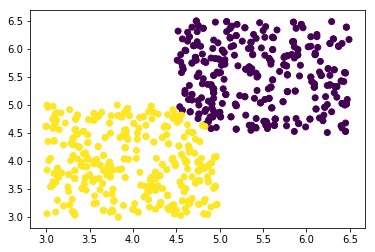

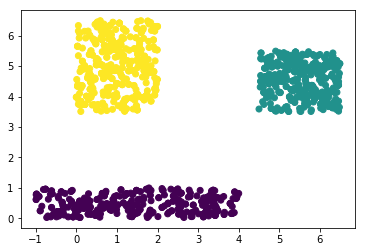

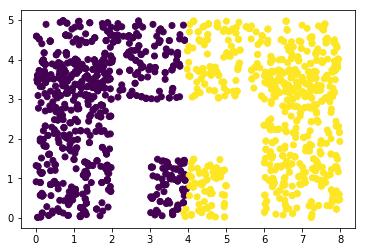

In [14]:
plt.scatter(df1[0], df1[1], c=labels1)
plt.show()
plt.scatter(df2[0], df2[1], c=labels2)
plt.show()
plt.scatter(df3[0], df3[1], c=labels3)
plt.show()

In [15]:
image = mpimg.imread('./mailru.jpg')

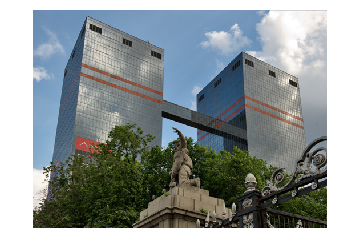

In [16]:
plt.axis("off")
plt.imshow(image)
plt.show()

In [17]:
data = image.reshape((image.shape[0]*image.shape[1],3))

In [18]:
immodel = KMeans(n_clusters=64, max_iter=50)

In [19]:
imlabels = immodel.fit(data)

(196215, 3)


In [20]:
imlabels.shape

(196215,)

In [21]:
new_image = []
for cluster in imlabels:
    new_image.append(immodel.centers[cluster])
new_image = np.array(new_image).astype(np.uint8)
new_image = new_image.reshape((image.shape[0],image.shape[1],3))

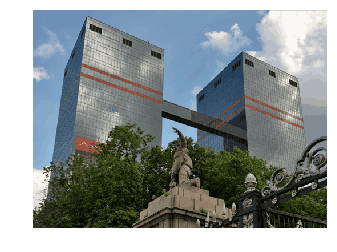

In [22]:
plt.axis("off")
plt.imshow(new_image)
plt.show()